In [1]:
import pandas as pd
import numpy as np

car_fuel_efficiency =  'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $car_fuel_efficiency

--2025-10-08 02:49:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-10-08 02:49:58 (23.6 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
len(df)

9704

In [7]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [9]:
print(df.shape)

(9704, 11)


In [10]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [8]:
df['fuel_efficiency_mpg']

0       13.231729
1       13.688217
2       14.246341
3       16.912736
4       12.488369
          ...    
9699    15.101802
9700    17.962326
9701    17.186587
9702    15.331551
9703    14.884467
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64

In [11]:
column_names = ['engine_displacement',  'horsepower', 'vehicle_weight',
                 'model_year', 'fuel_efficiency_mpg']

In [35]:
df_subset = df[column_names]

In [121]:
df_subset.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [37]:
df_subset

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [39]:
df_filled = df_subset.fillna(0)

In [41]:
df_filled.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [42]:
df_filled.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [43]:
df_filled.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
engine_displacement,9704.0,199.708368,49.455319,10.000000,10.000000,140.000000,170.000000,200.000000,230.000000,260.000000,280.000000,310.000000,380.000000
horsepower,9704.0,138.738355,48.401189,0.000000,0.000000,92.000000,124.000000,146.000000,168.000000,187.000000,198.000000,217.000000,271.000000
vehicle_weight,9704.0,3001.280993,497.894860,952.681761,952.681761,2366.705284,2666.248985,2993.226296,3334.957039,3639.429331,3819.762217,4177.957153,4739.077089
model_year,9704.0,2011.484027,6.659808,2000.000000,2000.000000,2002.000000,2006.000000,2012.000000,2017.000000,2021.000000,2022.000000,2023.000000,2023.000000
fuel_efficiency_mpg,9704.0,14.985243,2.556468,6.200971,6.200971,11.688767,13.267459,15.006037,16.707965,18.259461,19.150022,20.882064,25.967222


AttributeError: 'NoneType' object has no attribute 'fillna'

In [44]:
np.median(df_filled['horsepower'])

np.float64(146.0)

In [46]:
median_horsepower = df_subset['horsepower'].median()
median_horsepower

np.float64(149.0)

In [47]:
n = len(df_subset)

In [49]:
idx =np.arange(n)
idx
np.random.seed(2)
np.random.shuffle(idx)

In [50]:
n_val = int(n * 0.2)
n_test =  int(n * 0.2)
n_train = n - (n_val) - n_test

In [51]:
n_val

1940

In [20]:
n_test

1940

In [52]:
n_train

5824

In [53]:
n , n_val + n_test + n_train

(9704, 9704)

In [55]:
df_subset.iloc[[0,1,2]]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341


In [54]:
df_subset.iloc[9700:]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551
9703,270,140.0,2908.043477,2005,14.884467


In [56]:
df_subset.iloc[:n_val]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
1935,160,129.0,3157.084047,2010,14.287757
1936,200,120.0,2409.805200,2023,17.291549
1937,190,NaN,2953.047520,2002,15.468923
1938,210,168.0,3147.907270,2005,14.315125


In [57]:
df_val = df_subset.iloc[:n_val]
df_test = df_subset.iloc[n_val:n_val+ n_test]
df_train =   df_subset.iloc[n_val + n_test:]

In [58]:
df_train =  df_subset.iloc[:n_train]
df_val = df_subset.iloc[n_train:n_train+n_val]
df_test = df_subset.iloc[n_train+n_val:]

In [59]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
5819,160,156.0,2990.334203,2020,15.294958
5820,240,105.0,3495.100812,2014,12.426054
5821,210,171.0,3434.252180,2011,12.509291
5822,180,172.0,2967.708852,2018,14.746571


In [60]:
df_train =  df_subset.iloc[idx[:n_train]]
df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
df_test = df_subset.iloc[idx[n_train+n_val:]]

In [61]:
df_train, df_val,df_test

(      engine_displacement  horsepower  vehicle_weight  model_year  \
 246                   170       164.0     2990.040917        2019   
 8125                  170         NaN     2729.623741        2012   
 1927                  200       142.0     3126.513375        2019   
 8235                  200       148.0     3136.477901        2003   
 424                   230       141.0     3384.681613        2006   
 ...                   ...         ...             ...         ...   
 5313                  210       145.0     3054.841280        2021   
 4484                  210       142.0     2440.034914        2021   
 7107                  260       169.0     2701.627103        2002   
 9043                  240       137.0     2383.896460        2016   
 1612                  160         NaN     2417.610650        2005   
 
       fuel_efficiency_mpg  
 246             15.963019  
 8125            15.931964  
 1927            14.284901  
 8235            14.865210  
 424         

In [62]:
len(df_train), len(df_val),len(df_test)

(5824, 1940, 1940)

In [63]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [64]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,164.0,2990.040917,2019,15.963019
1,170,NaN,2729.623741,2012,15.931964
2,200,142.0,3126.513375,2019,14.284901
3,200,148.0,3136.477901,2003,14.865210
4,230,141.0,3384.681613,2006,12.428822
...,...,...,...,...,...
5819,210,145.0,3054.841280,2021,14.216871
5820,210,142.0,2440.034914,2021,17.826995
5821,260,169.0,2701.627103,2002,16.028769
5822,240,137.0,2383.896460,2016,17.794204


In [66]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

In [39]:
y_train

array([2.77690288, 2.28237973, 2.48946539, ..., 2.47049577, 2.88753725,
       2.62099978], shape=(5824,))

In [41]:
y_val

array([2.61030508, 2.89988282, 2.83141974, ..., 2.92443689, 2.75473268,
       2.6887522 ], shape=(1940,))

In [42]:
y_test

array([2.38973366, 2.83562023, 2.87212187, ..., 3.06456356, 2.99866793,
       2.91448001], shape=(1940,))

In [67]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [44]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,130,4.0,140.0,2958.050037,13.9,2008,Asia,Gasoline,All-wheel drive,0.0
1,310,5.0,181.0,4126.320291,20.7,2004,USA,Diesel,All-wheel drive,0.0
2,260,4.0,NaN,3948.404625,15.5,2018,Asia,Diesel,All-wheel drive,-1.0
3,280,NaN,157.0,2728.375114,17.6,2002,USA,Gasoline,All-wheel drive,0.0
4,190,3.0,90.0,3603.494149,17.1,2016,Europe,Diesel,All-wheel drive,1.0
...,...,...,...,...,...,...,...,...,...,...
5819,150,2.0,163.0,2564.488443,19.2,2012,Asia,Diesel,Front-wheel drive,-1.0
5820,210,4.0,137.0,2786.666205,16.9,2016,Europe,Diesel,Front-wheel drive,0.0
5821,110,NaN,159.0,3634.283068,NaN,2022,Asia,Diesel,All-wheel drive,-1.0
5822,230,2.0,158.0,2705.486173,12.7,2003,Europe,Gasoline,All-wheel drive,1.0


In [68]:
len(y_train)

5824

In [69]:
df_train.iloc[10]

engine_displacement     110.000000
horsepower              161.000000
vehicle_weight         3064.002707
model_year             2002.000000
Name: 10, dtype: float64

In [84]:
xi =[161,3064,2002]
xi
w0=7.17
w= [0.01,0.04,0.002]

In [85]:
def liner_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]


    return pred    

In [86]:
liner_regression(xi)

135.344

In [100]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,  X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]     

In [101]:
train_linear_regression(X,y)

NameError: name 'X' is not defined

In [79]:
def dot(xi,w):
    n =  len(xi)

    res =0.0

    for j in range(n):
        res = res + xi[j] + w[j]

    return res

In [80]:
def liner_regression1(xi):
    return w0 + dot(xi,w)

In [81]:
w_new =  [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [82]:
def liner_regression1(xi):
    xi =  [1] + xi    
    return w0 + dot(xi,w_new)

In [87]:
liner_regression1(xi)

5242.392

In [90]:
df_train.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')

In [91]:
base =['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [92]:
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year
0,170,164.0,2990.040917,2019
1,170,NaN,2729.623741,2012
2,200,142.0,3126.513375,2019
3,200,148.0,3136.477901,2003
4,230,141.0,3384.681613,2006
...,...,...,...,...
5819,210,145.0,3054.841280,2021
5820,210,142.0,2440.034914,2021
5821,260,169.0,2701.627103,2002
5822,240,137.0,2383.896460,2016


In [93]:
x_train = df_train[base].values

In [94]:
df_train[base].isnull().sum()

engine_displacement      0
horsepower             413
vehicle_weight           0
model_year               0
dtype: int64

In [95]:
x_train = df_train[base].fillna(0).values

In [96]:
x_train

array([[ 170.        ,  164.        , 2990.04091672, 2019.        ],
       [ 170.        ,    0.        , 2729.62374119, 2012.        ],
       [ 200.        ,  142.        , 3126.51337459, 2019.        ],
       ...,
       [ 260.        ,  169.        , 2701.62710304, 2002.        ],
       [ 240.        ,  137.        , 2383.8964603 , 2016.        ],
       [ 160.        ,    0.        , 2417.61065044, 2005.        ]],
      shape=(5824, 4))

In [97]:
df_train[base].fillna(0).isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [98]:
y_train

array([2.83103561, 2.82920322, 2.72686549, ..., 2.8349042 , 2.93354855,
       2.94678157], shape=(5824,))

In [102]:
w0, w=train_linear_regression(x_train,y_train)

In [103]:
w0,w

(np.float64(3.4836343845344357),
 array([ 7.48585751e-06,  2.43675962e-04, -3.21959038e-04,  1.02373968e-04]))

In [104]:
y_pred = w0 +x_train.dot(w)

In [106]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


<Axes: ylabel='Count'>

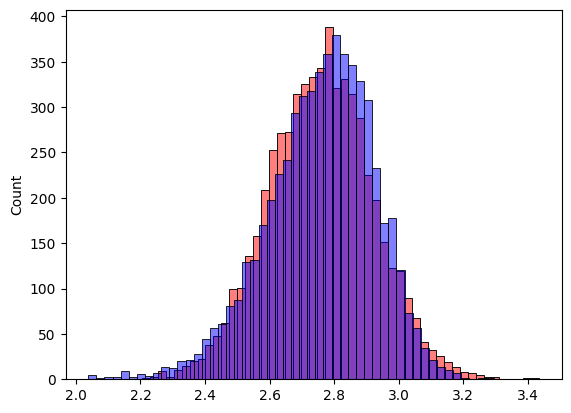

In [107]:
sns.histplot(y_pred,color = 'red', alpha =  0.5, bins =50)
sns.histplot(y_train, color ='blue',alpha =  0.5, bins =50)

In [108]:
def rmse(y,y_pred):
    error =  y- y_pred
    se =  error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [109]:
rmse(y_train, y_pred)

np.float64(0.03902570026567233)

In [111]:
base =['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
df_train[base]
x_train = df_train[base].fillna(0).values
w0, w=train_linear_regression(x_train,y_train)
y_pred = w0 +x_train.dot(w)

In [112]:
def prepare_X(df):
    df_num = df[base]
    df_num =df_num.fillna(0)
    X = df_num.values
    return X    

In [113]:
X_train =  prepare_X(df_train)
w0, w=train_linear_regression(X_train,y_train)

X_val =  prepare_X(df_val)
y_pred =  w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.039446530525595505)

In [116]:
df_train.model_year.max()

np.int64(2023)

In [117]:
def train_linear_regresson_reg(X,y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full =  XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]       

In [118]:
X_train =  prepare_X(df_train)
w0, w = train_linear_regresson_reg(X_train,y_train, r=0.01)

X_val =  prepare_X(df_val)
y_pred =  w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.039515104916555806)

In [120]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train =  prepare_X(df_train)
    w0, w = train_linear_regresson_reg(X_train,y_train, r=r)
    
    X_val =  prepare_X(df_val)
    y_pred =  w0 + X_val.dot(w)    
    score =np.round(rmse(y_val, y_pred),2)

    print(r, w0, score)

0 3.4836343845344357 0.04
0.01 3.0077488644306047 0.04
0.1 1.3490966793151866 0.04
1 0.20708900717753925 0.04
5 0.04348656887288953 0.04
10 0.021880298240084226 0.04
100 0.00220128711783084 0.04


In [124]:
data_subset

NameError: name 'data_subset' is not defined

In [130]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx =np.arange(n) 
    np.random.seed(r)
    np.random.shuffle(idx)
    
    df_train =  df_subset.iloc[:n_train]
    df_val = df_subset.iloc[n_train:n_train+n_val]
    df_test = df_subset.iloc[n_train+n_val:]
    
    df_train =  df_subset.iloc[idx[:n_train]]
    df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
    df_test = df_subset.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    
    X_null_train = prepare_X(df_train)
    w0, w=train_linear_regression(X_null_train ,y_train)
    
    X_null_val =  prepare_X(df_val)
    y_pred =  w0 + X_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_pred),2)
    
    rmse_list.append(rmse_val)
    print(r, w0, rmse_val)

0 3.5840552002665245 0.23
1 3.802370265133959 0.23
2 3.4836343845344357 0.04
3 3.657951656449596 0.24
4 3.5304453062056993 0.23
5 3.489796183072592 0.22
6 3.440222584817519 0.23
7 3.606243552753437 0.23
8 3.4845126366830237 0.22
9 3.593421326834908 0.22


In [131]:
rmse_list

[np.float64(0.23),
 np.float64(0.23),
 np.float64(0.04),
 np.float64(0.24),
 np.float64(0.23),
 np.float64(0.22),
 np.float64(0.23),
 np.float64(0.23),
 np.float64(0.22),
 np.float64(0.22)]

In [132]:
np.round(np.std(rmse_list),3)

np.float64(0.057)

In [136]:
rmse_list = []
r=0.001

for r in [9]:

    idx =np.arange(n) 
    np.random.seed(r)
    np.random.shuffle(idx)
    
    df_train =  df_subset.iloc[:n_train]
    df_val = df_subset.iloc[n_train:n_train+n_val]
    df_test = df_subset.iloc[n_train+n_val:]
    
    df_train =  df_subset.iloc[idx[:n_train]]
    df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
    df_test = df_subset.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    
    X_null_train = prepare_X(df_train)
    w0, w = train_linear_regresson_reg(X_train,y_train, r=r)
    
    X_null_val =  prepare_X(df_val)
    y_pred =  w0 + X_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_pred),2)
    
    rmse_list.append(rmse_val)
    print(r, w0, rmse_val)

9 0.022220626930567193 0.16


In [137]:
rmse_list

[np.float64(0.16)]

In [138]:
np.round(np.std(rmse_list),3)

np.float64(0.0)